In [124]:
# ANLY501 - HW4
# Author: Kate Zeng

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline

In [125]:
# load data
data = pd.read_csv('NY_Times_LARGE.csv')

In [126]:
# preprocessing
def create_test_data(df):
    # print to screen the first 10 row of the data
    print('The first 10 rows of data is:\n')
    print(df.head(10))
    # creat a test dataframe with first 1000 entries
    test_data = df.head(1000)
    return test_data

In [127]:
test_data = create_test_data(data)

The first 10 rows of data is:

   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1
5   47       0           11       1          1
6    0       0            7       1          0
7   46       0            5       0          1
8   16       0            3       0          1
9   52       0            4       0          1


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


In [129]:
data['Age'].unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104], dtype=int64)

In [130]:
# check if there's null value contained in each column
data.isnull().any()

Age            False
Gender         False
Impressions    False
Clicks         False
Signed_In      False
dtype: bool

In [131]:
# first binning strategy: by age group
# age <=12: child, 13 < age <= 17: teenager, 18 < age <= 44: adult, 45 < age <= 60: middle-aged, age > 60: seniors
bins_agegroup = [-math.inf, 12, 17, 44, 60, math.inf]
label_ag = [1, 2, 3, 4, 5]
test_data['age_group'] = pd.cut(test_data['Age'], bins = bins_agegroup, labels = label_ag)

C:\Users\Yunjia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [132]:
# second binning strategy: by tens
# age <= 20, 20 < age <= 30, 30 < age <= 40, 40 < age <= 50, 50 < age <= 60, 60 < age <= 70, age > 70
bins_tens = [-math.inf, 20, 30, 40, 50, 60, 70, math.inf]
label_tens = [1, 2, 3, 4, 5, 6, 7]
test_data['age_tens'] = pd.cut(test_data['Age'], bins = bins_tens, labels = label_tens)

C:\Users\Yunjia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [133]:
# a column that represents the ratio between Impressions and Clicks is also good to be binned, therefore we can group
# people to groups that shows how likely they would click an advertisement
# Create a variable called ClickThrougRate (# of clicks/# of impressions)
test_data['ClickThrougRate'] = test_data['Clicks'] / test_data['Impressions']

C:\Users\Yunjia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [134]:
# histogram of Impression based on gender

def impression_by_gender(df):
    male = df[df['Gender'] == 0]['Impressions']
    female = df[df['Gender'] == 1]['Impressions']
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.hist([male, female], label = ['M', 'F'])
    ax.set_title("Histogram of Impressions by Gender")
    ax.set_xlabel("Number of Imporessions")
    ax.set_ylabel("Frequency")
    ax.legend(loc='upper right')
    return fig

C:\Users\Yunjia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


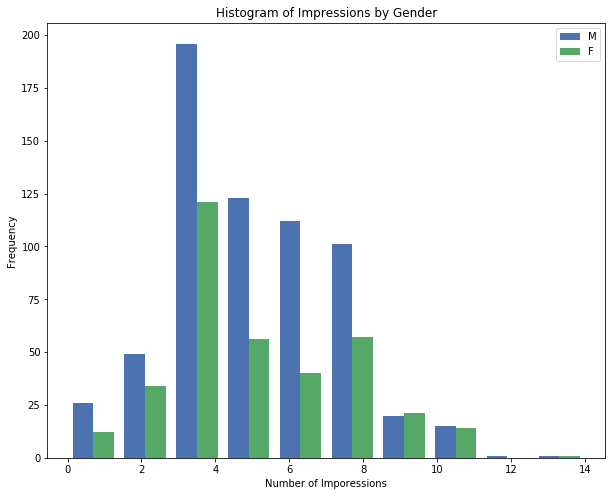

In [135]:
# output histogram
hist_gender_impressions = impression_by_gender(test_data)

In [136]:
# histogram of Impressions based on age group
def impression_by_age(df):
    ag1 = df[df['age_group'] == 1]['Impressions']
    ag2 = df[df['age_group'] == 2]['Impressions']
    ag3 = df[df['age_group'] == 3]['Impressions']
    ag4 = df[df['age_group'] == 4]['Impressions']
    ag5 = df[df['age_group'] == 5]['Impressions']
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.hist([ag1, ag2, ag3, ag4, ag5], label = ['Child', 'Teenager', 'Adult', 'Middle-age', 'Senior'])
    ax.set_title("Histogram of Impressions by Age Group")
    ax.set_xlabel("Number of Imporessions")
    ax.set_ylabel("Frequency")
    ax.legend(loc='upper right')
    return fig

C:\Users\Yunjia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


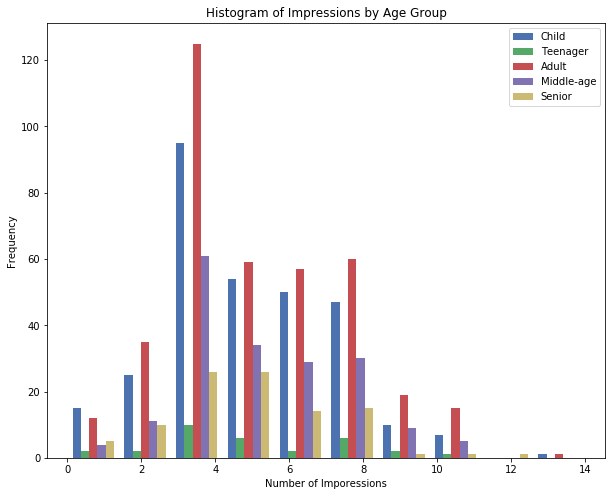

In [137]:
hist_age_impressions = impression_by_age(test_data)

In [144]:
# Plot the distribution of the number of impressions for the age categories created.
def hists_age_impressions(df):
    # Get unique Age groups. Iterate through list and plot each histogram
    ageSeries = df['age_group'].unique()
    ageSeries.sort()
    # Iterate through each age and generate the plot
    counter = 1
    for age in ageSeries:
        # We need to select rows containing a particular age
        queryString = "age_group == " + str(age)
        ageGroupImpressions = df[['age_group', 'Impressions']].query(queryString)

        # Create histogram and label it
        ageGroupImpressions['Impressions'].hist()
        titleLabel = "Distribution of Impressions for Age Group " + str(age)
        plt.title(titleLabel)
        plt.xlabel("Number of Impressions")
        plt.ylabel("Frequency")

        # Write to file
        fileName = 'age' + str(counter) + '.png'
        plt.savefig(fileName)

        # Clear plot
        plt.clf()
        counter += 1

In [139]:
# try 3 different values of k of k-means clustering
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import preprocessing
from pprint import pprint
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score

def kmeans_clustering(df, n):
    myData = pd.concat([df['Age'], df['Gender'], df['Impressions'], df['Clicks'], df['Signed_In'], df['age_group'], df['ClickThrougRate']], 
                 axis=1, keys=['Age', 'Gender', 'Impressions', 'Clicks', 'Signed_In','age_group', 'ClickThrougRate' ])
    myData = myData.dropna()
    x = myData.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalizedDataFrame = pd.DataFrame(x_scaled)
    k = n
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(normalizedDataFrame)
    silhouette_avg = silhouette_score(normalizedDataFrame, cluster_labels)
    #calinski_harabaz_avg = calinski_harabaz_score(normalizedDataFrame, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)
    #print("For n_clusters =", k, "The average calinski_harabaz_score is :", calinski_harabaz_avg)

In [140]:
kmeans_clustering(test_data, 3)
kmeans_clustering(test_data, 5)
kmeans_clustering(test_data, 10)

C:\Users\Yunjia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For n_clusters = 3 The average silhouette_score is : 0.664103137401
For n_clusters = 5 The average silhouette_score is : 0.541672130491
For n_clusters = 10 The average silhouette_score is : 0.459208671435


In [141]:
# CATEGORICAL VARIABLES
# Create a new variable that categorizes behavior based on click-thru rate.
# Create categories for click thru behavior. We can do this on the original data
def click_behavior(row):
   if row['Clicks'] > 0:
      return 'Clicks'
   if row['Impressions'] == 0:
      return 'noImpressions'
   if row['Impressions'] > 0:
      return 'Impressions'

   return 'Other'

# Create a new variable that categorizes behavior based on click-thru rate.
# Create categories for click thru behavior. We can do this on the original data
test_data['clickBehavior']  = test_data.apply(lambda row: click_behavior(row), axis=1)

C:\Users\Yunjia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [142]:
def kmeans_clustering_new(df, n):
    myData = pd.concat([df['Age'], df['Gender'], df['Impressions'], df['Clicks'], df['Signed_In'], df['age_group'], df['ClickThrougRate'], df['clickBehavior']], 
                 axis=1, keys=['Age', 'Gender', 'Impressions', 'Clicks', 'Signed_In','age_group', 'ClickThrougRate', 'clickBehavior'])
    codes = {'Clicks': 1, 'Impressions': 2, 'noImpressions': 3, 'Other': 4}
    myData['clickBehavior'] = myData['clickBehavior'].map(codes)
    myData = myData.dropna()
    x = myData.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalizedDataFrame = pd.DataFrame(x_scaled)
    k = n
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(normalizedDataFrame)
    silhouette_avg = silhouette_score(normalizedDataFrame, cluster_labels)
    #calinski_harabaz_avg = calinski_harabaz_score(normalizedDataFrame, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)
    #print("For n_clusters =", k, "The average calinski_harabaz_score is :", calinski_harabaz_avg)

In [143]:
kmeans_clustering_new(test_data, 3)
kmeans_clustering_new(test_data, 5)
kmeans_clustering_new(test_data, 10)

C:\Users\Yunjia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For n_clusters = 3 The average silhouette_score is : 0.622112818143
For n_clusters = 5 The average silhouette_score is : 0.685666999816
For n_clusters = 10 The average silhouette_score is : 0.558736335259
